# Chatbot Test Notebook

Analysis of a chatbot's performance using various metrics.

In [31]:
import textwrap
import json
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [32]:

VECTORDB_SUFFIX = "_techrules"   # "_techrules"  "_semantic" 

In [33]:
# retrieve dataframe from pickle file
with open(f"../results/test_results_df{VECTORDB_SUFFIX}.pkl", "rb") as f:
    test_results_df = pickle.load(f)
test_results_df.head()

,question,situation,query_time,response_eval_time,llm_response,correctness_score,feedback,target
0,A breaststroke swimmer moves their hands in a ...,9,1.663340,2.153932,"Based on the provided rules, a breaststroke sw...",True,The output provided is factually accurate as i...,"No, the swimmer should not be disqualified. Th..."
1,"In a 9-10 100 yard breaststroke event, a swimm...",10,1.594882,2.910576,"Based on the provided rules, there is no speci...",False,The evaluation criteria require an accurate as...,The swimmer left the wall on the back and then...
2,"In a 9-10 100 yard breaststroke event, a swimm...",11,0.493193,2.053674,I don't have that rule in my current documenta...,False,The output does not provide any of the accurat...,"No call should be made. The rule states, “It i..."
3,"In a senior 100 yard breaststroke event, the t...",12,1.204401,2.050892,"Yes, the swimmer should be disqualified. Accor...",False,The provided output indicates that the swimmer...,The swimmer should not be disqualified. The ru...
4,When a swimmer left the wall at the first turn...,13,1.273304,2.354986,"Yes, the swimmer should have been disqualified...",True,The response correctly states that the swimmer...,"Yes. The rule states, “After the start and aft..."


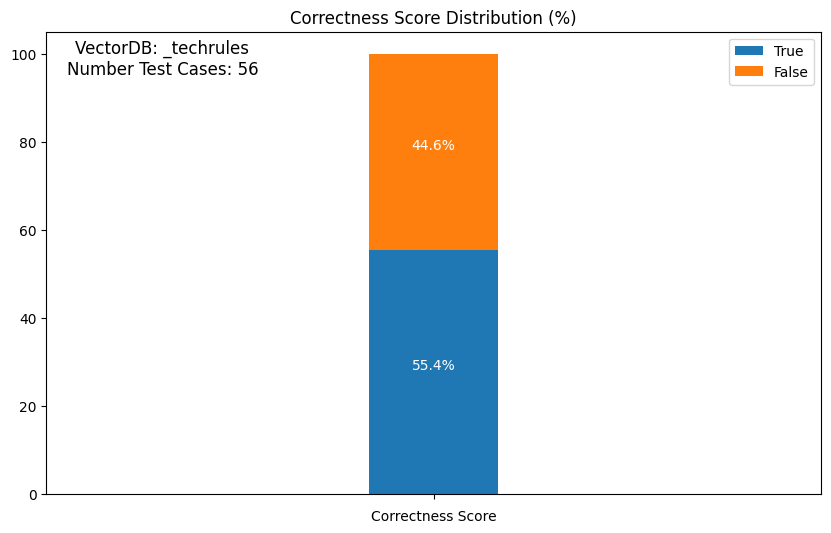

In [34]:

fig, ax = plt.subplots(figsize=(10, 6))
# Set the figure size
# Calculate value counts and normalize to percentages
value_counts = test_results_df['correctness_score'].value_counts(normalize=True).mul(100)


# Create a stacked bar plot
df = pd.DataFrame(value_counts).T
df.columns = value_counts.index.astype(str).to_list()
df.rename(index={"proportion": 'correctness_score'}, inplace=True)
df = df[["True", "False"]]
df.plot.bar(stacked=True, ax=ax, width=0.1)
plt.title('Correctness Score Distribution (%)')
ax.set_xticklabels([], rotation=0)
plt.xlabel('Correctness Score')


# label the bars with percentage values
value_patches = zip(value_counts, ax.patches)
for value, patch in value_patches:
    height = patch.get_height()
    ax.annotate(f'{value:.1f}%', 
                xy=(patch.get_x() + patch.get_width() / 2, patch.get_y() + value / 2), 
                ha='center', va='bottom', fontsize=10, color="white")
    
# annotate chart with number of test cases
total_test_cases = len(test_results_df)
ax.annotate(f'VectorDB: {VECTORDB_SUFFIX }\nNumber Test Cases: {total_test_cases}', 
            xy=(0.15, 0.9), 
            ha='center', va='bottom', fontsize=12, color="black", xycoords='axes fraction')


# Create stacked bar plot

plt.show()

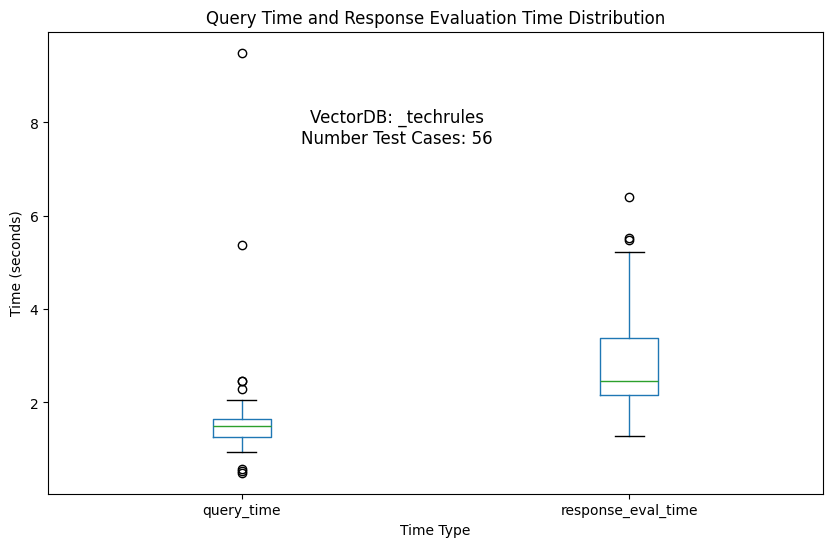

In [35]:
# boxplot for query_time and response_eval_time
fig, ax = plt.subplots(figsize=(10, 6)) 
# Set the figure size
# Create boxplot
test_results_df[["query_time", "response_eval_time"]].boxplot(ax=ax, grid=False)
plt.title('Query Time and Response Evaluation Time Distribution')
plt.ylabel('Time (seconds)')
plt.xlabel('Time Type') 

ax.annotate(f'VectorDB: {VECTORDB_SUFFIX }\nNumber Test Cases: {total_test_cases}', 
            xy=(0.45, 0.75), 
            ha='center', va='bottom', fontsize=12, color="black", xycoords='axes fraction')


plt.show()

In [36]:
test_results_df[["query_time", "response_eval_time"]].describe()

,query_time,response_eval_time
count,56.000000,56.000000
mean,1.668247,2.931676
std,1.249632,1.135610
min,0.493193,1.286410
25%,1.261449,2.160004
50%,1.498497,2.467288
75%,1.641150,3.385055
max,9.498704,6.391756


In [37]:
for idx,row in test_results_df.iterrows():
    if not row['correctness_score']:
        print(f"\n>>>QUERY {row['situation']} {textwrap.fill(row['question'], width=90)}")
        print(f">>>ANSWER {textwrap.fill(row['llm_response'], width=90)}")
        print(f">>>TARGET {textwrap.fill(row['target'], width=90)}")
        print(f">>>CORRECTNESS {row['correctness_score']} ")
        print(f">>>FEEDBACK {textwrap.fill(row['feedback'], width=90)}")


>>>QUERY 10 In a 9-10 100 yard breaststroke event, a swimmer completes 50 yards and, thinking that the
race is over, pushes back from the wall to read the scoreboard. At this point, realizing
that the race is only halfway over, the swimmer returns to the wall, pushes off on the
breast, and completes the required distance in good form. What call, if any, should be
made?
>>>ANSWER Based on the provided rules, there is no specific rule violation mentioned for a swimmer
mistakenly stopping at the halfway point, returning to the wall, and then continuing the
race. The rules for breaststroke (101.2) require that the swimmer's body be on the breast
when leaving the wall, which the swimmer complied with upon resuming the race. Since there
is no explicit rule prohibiting the swimmer's actions in this scenario, no
disqualification should be made.
>>>TARGET The swimmer left the wall on the back and then returned to the wall before resuming the
stroke. One violation that could be called would be 